<a href="https://colab.research.google.com/github/rohhj622/windPowerPrediction/blob/master/firstDataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

*   총 52584
*   기상청데이터 + 발전량 데이터
*   빈 값 앞에 갚으로 채우기
*   datetime 컬럼 만듦
*   필요없는 컬럼 제거



In [270]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

## 1. 발전 실적을 한 줄의 데이터로 만들기

*   한국 남부 발전 성산풍력 발전량
*   1~24 컬럼을 한 줄로 만들기
화이팅




In [410]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [411]:
time_power=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/original/time_power.CSV',header=None) # 컬럼명 숫자로 들어가게
time_power.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524
0,0,3031,5741,8300,7822,253,7400,9893,11435,7575,3665,461,1381,5021,10360,2908,10174,9139,4776,1232,5083,8870,3625,1712,9274,168,7130,8555,0,0,56,10024,11307,4757,2295,7728,8670,4799,10708,2977,...,1608,2463,681,2827,2355,3465,2671,0,1164,1012,1030,970,0,3571,0,1598,1431,9495,9390,3556,2812,3493,283,8582,0,3817,2124,9463,7353,3697,1180,1573,680,0,9998,6657,1527,4589,1385,341
1,0,3051,8666,8573,8462,1593,9963,9542,11982,7607,7489,45,907,5575,9654,3459,10914,9472,3402,1408,6047,8434,3859,2802,8403,0,6988,5496,0,0,396,10125,10747,7110,1925,9007,8780,3767,10735,2833,...,1266,2595,4618,4173,2371,2818,2731,0,1372,582,1556,646,0,2765,151,3817,2858,7908,9677,2533,1054,4591,0,9539,0,2355,3110,8357,7484,5004,1056,1230,933,0,9992,6274,1234,4392,1504,114
2,92,3173,10320,8584,8129,4009,7356,10309,9841,8289,4497,6,1432,5812,10294,5277,10419,10874,92,568,5510,9109,3328,2548,8374,0,7745,3675,0,0,1697,8235,8944,7720,3659,5974,8332,3356,10794,4193,...,1725,2065,5854,3923,3808,2266,2716,48,920,380,1800,378,134,1920,377,6016,1728,7191,5786,1352,1492,1598,0,8855,0,3946,2763,9408,6773,5671,1026,583,821,113,9330,6278,884,4071,2369,105
3,269,4196,10799,7192,9295,6941,6366,8454,11463,5521,6038,328,653,4888,8387,5215,9145,11701,1165,36,5915,11306,3995,5848,8470,112,7614,3194,0,0,2112,8213,8946,7680,1263,3032,9374,2681,10916,2295,...,1510,2806,4609,2837,5107,2630,2336,521,337,1036,2396,44,263,1738,29,6560,1248,4537,1976,147,1389,1981,0,8436,0,868,1669,8170,9020,5832,761,303,844,0,6878,6605,748,4389,3027,64
4,541,5429,8959,7834,10876,8202,9109,5602,9826,5429,4497,486,306,5520,3934,4333,9308,11854,790,0,7356,11978,3168,4948,9052,533,8615,3499,34,0,1185,9907,9942,7419,3878,642,9236,5479,11282,3413,...,1455,2805,4114,1252,7525,2879,1545,682,398,850,2272,0,498,1163,0,7507,1274,4073,3379,70,749,1507,0,7196,0,162,947,9804,7225,3770,881,26,380,342,5994,4342,1247,5753,4530,0
5,945,7473,9078,7959,10816,6029,10043,5768,7631,6637,4027,2134,786,4853,2774,5043,9795,10530,1105,0,5665,11476,3596,3994,8397,659,9282,2017,642,0,710,9164,9998,6109,3784,189,8571,5273,10747,4440,...,1675,2184,4547,2393,6878,2230,1720,2338,407,1047,1878,0,202,729,0,5625,1151,2187,4373,586,2557,2273,0,7944,0,162,2368,9993,7074,3823,1117,53,308,396,6078,3008,2001,5555,3452,0
6,699,4464,10585,8930,10215,4359,9592,6056,7508,6463,3006,1914,837,6123,2855,1349,8605,10893,262,0,5389,11080,4521,3197,7716,146,9574,1378,1042,0,1077,8847,9993,5640,7757,8,7430,6377,11287,4066,...,1778,2791,5912,2468,8965,3462,1661,528,366,933,884,0,122,583,277,4256,2019,2385,3885,520,2759,2737,277,9649,0,99,3995,9985,7685,3590,1404,414,564,953,7730,3906,2635,3558,4203,0
7,1371,2120,8188,8961,10735,1817,10755,6048,6314,4360,1235,783,202,9066,2065,1651,10257,8965,192,0,2975,9447,4406,431,8339,839,8102,1430,698,0,1617,9074,8863,2519,9980,0,8534,8386,11774,2376,...,903,2451,5001,3542,6630,4418,952,421,1024,719,596,0,475,173,497,3665,2276,3108,4309,784,1398,2972,1028,9833,634,35,3820,8429,6252,2043,1104,276,1535,497,9981,2661,3065,5444,4916,0
8,1974,1935,8642,10024,10172,524,9239,7667,5859,2973,698,1025,329,9699,828,1067,11361,9265,314,0,4540,7431,5356,1900,8616,1002,9111,1669,708,0,1593,9151,9880,1072,10001,14,11393,9023,11814,4038,...,842,2828,4957,3717,7149,2825,621,2278,358,1098,930,0,227,1040,385,4195,2313,4768,3225,1047,1540,1021,713,9252,268,0,4096,5388,6291,1656,649,220,1975,535,9621,2323,3647,5975,3210,0
9,1425,2798,10433,10800,9078,398,8869,6399,5105,2549,167,584,733,11902,108,2986,11707,9821,1668,0,10576,7559,4613,764,10589,2330,8776,1604,501,0,2088,10831,10410,215,11321,722,10387,11157,11609,4014,...,1580,3074,4165,5889,8672,2529,330,1875,519,177,1856,23,235,754,357,3793,4976,4576,3660,1647,2809,1324,248,9

In [412]:
final_time_power = pd.DataFrame(columns=['windForce'])

In [413]:
type(final_time_power)
print(final_time_power.shape)
print(final_time_power)

(0, 1)
Empty DataFrame
Columns: [windForce]
Index: []


In [414]:
for i in range(0,len(time_power.columns)):
    for j in range(0,24): # 마음에 들지 않지만 하나하나 골라서 추가,,,
        final_time_power = final_time_power.append({"windForce":time_power[i][j]}, ignore_index=True)
        #print(time_power[i][j])

In [415]:
#위 1분 54초 걸림
final_time_power1 = final_time_power.copy()

In [416]:
#test.to_csv("time_power_1_row.csv", mode='w')

In [417]:
final_time_power1

,windForce
0,0
1,0
2,92
3,269
4,541
...,...
60595,498
60596,474
60597,2250
60598,2645


## 2. 기상청 데이터 이어 붙이기

In [418]:
foreData=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/original/1.csv', encoding='euc-kr', header = None)

#foreData = foreData.fillna(0) # 빈 값 0으로 
foreData = foreData.drop(index=0) # 컬럼명 적혀있는 거 지움
foreData = foreData.drop(0,1) # 컬럼 삭제는 axis = 1 그래서 뒤에 1 있는 거
"""foreData.columns  = ['date','tem','temQC'
          ,'rain','rainQC'
           ,'windSpeed','windSpeedQC','windDirection','windDirectionQC'
           ,'snow','snow3Hour'
           ,'cloud','middleCloud','clodeUn','highCloud'] #컬럼명 지정"""

foreData

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
1,2013-01-01 00:00,1.3,NaN,3.2,340,77,5.2,-2.2,1019.1,1021.3,NaN,NaN,NaN,NaN,3,3,Sc,10,2000,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2013-01-01 01:00,.9,NaN,2.6,320,77,5,-2.6,1019,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2013-01-01 02:00,1.5,NaN,3,340,77,5.2,-2.1,1019,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2013-01-01 03:00,2.7,0,1.7,270,74,5.5,-1.4,1019,1021.2,NaN,NaN,NaN,NaN,9,9,Sc,10,2000,1,01,.3,NaN,NaN,NaN,NaN
5,2013-01-01 04:00,.6,NaN,1.8,320,82,5.2,-2.1,1018.5,1020.8,NaN,NaN,NaN,NaN,3,3,Sc,10,2000,NaN,NaN,.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2013-12-31 19:00,9.8,NaN,3,200,45,5.5,-1.5,1011.9,1014.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
8757,2013-12-31 20:00,9.9,NaN,3.7,250,41,5,-2.7,1012.5,1014.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,NaN,NaN,NaN,NaN
8758,2013-12-31 21:00,9.4,NaN,2.7,250,40,4.7,-3.5,1012.8,1015,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2000,1,NaN,5.1,NaN,NaN,NaN,NaN
8759,2013-12-31 22:00,9.2,NaN,3.2,250,40,4.6,-3.7,1013.1,1015.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN,NaN


In [419]:
for i in range(2,7): #2019년도 뺌
    fileName = '/content/gdrive/My Drive/Colab Notebooks/original/'+str(i)+'.csv'
    if (i == 7) : foreData1 = pd.read_csv(fileName, encoding='utf-8', header = None)# 컬럼명 숫자로 들어가게
    else : foreData1 = pd.read_csv(fileName, encoding='euc-kr', header = None)# 컬럼명 숫자로 들어가게
    #print(foreData1)

    #data2 = data2.fillna(0) # 빈 값 0으로 

    foreData1 = foreData1.drop(index=0) # 컬럼명 적혀있는 거 지움
    foreData1 = foreData1.drop(0,1) # 지점 컬럼 삭제는 axis = 1 그래서 뒤에 1 있는 거
    #print(foreData1)
    """foreData1.columns  = ['date','tem','temQC'
           ,'rain','rainQC'
           ,'windSpeed','windSpeedQC','windDirection','windDirectionQC'
           ,'snow','snow3Hour'
           ,'cloud','middleCloud','clodeUn','highCloud'] #컬럼명 지정"""
    foreData = pd.concat([foreData, foreData1]) # 아래로 데이터 합치기(df 끼리, 아주 효자임)
#foreData.to_csv("weather_data_day.csv", mode='w')

### 0) 인덱스 설정

In [420]:
foreData = foreData.reset_index()  #index reset
foreData = foreData.drop('index',1) # index reset 하면 기존 index가 컬럼에 추가되므로 삭제
foreData

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,2013-01-01 00:00,1.3,NaN,3.2,340,77,5.2,-2.2,1019.1,1021.3,NaN,NaN,NaN,NaN,3,3,Sc,10,2000,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2013-01-01 01:00,.9,NaN,2.6,320,77,5,-2.6,1019,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2013-01-01 02:00,1.5,NaN,3,340,77,5.2,-2.1,1019,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2013-01-01 03:00,2.7,0,1.7,270,74,5.5,-1.4,1019,1021.2,NaN,NaN,NaN,NaN,9,9,Sc,10,2000,1,01,.3,NaN,NaN,NaN,NaN
4,2013-01-01 04:00,.6,NaN,1.8,320,82,5.2,-2.1,1018.5,1020.8,NaN,NaN,NaN,NaN,3,3,Sc,10,2000,NaN,NaN,.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,2018-12-31 19:00,4.3,NaN,4.7,340,58,4.8,-3.2,1032.1,1034.7,NaN,NaN,NaN,NaN,10,9,NaN,12,2000,NaN,NaN,3.3,NaN,NaN,NaN,NaN
52581,2018-12-31 20:00,3.9,NaN,4.5,360,61,4.9,-2.9,1032,1034.6,NaN,NaN,NaN,NaN,8,8,NaN,13,2000,NaN,NaN,2.9,NaN,NaN,NaN,NaN
52582,2018-12-31 21:00,3.5,NaN,4,360,59,4.6,-3.7,1031.9,1034.5,NaN,NaN,NaN,NaN,8,8,NaN,13,2000,NaN,NaN,1.9,NaN,NaN,NaN,NaN
52583,2018-12-31 22:00,3.8,NaN,3.4,20,61,4.9,-3,1031.6,1034.2,NaN,NaN,NaN,NaN,9,8,NaN,12,2000,NaN,NaN,2.1,NaN,NaN,NaN,NaN


### 1) 2016 년 1월 30분 데이터 5개 삭제

*   2016-01-24 20:30, 21:30, 22:30, 23:30
*   2016-01-25 00:30


In [421]:
foreData1 = foreData.copy()

In [422]:
u = 2016
for j in range(24,26,1):
  if j<10: y = str(u)+"-01-0"+str(j)+" "
  else : y = str(u)+"-01-"+str(j)+" "
  for i in range(0,24):
    if i<10: num1 = y + "0"+str(i)+":30"
    else : num1 = y+ str(i)+":30"
    #print(num1, len(foreData1[foreData1[1].str.contains(num1)])

In [423]:
foreData1.drop(foreData1.loc[foreData1[1].str.contains(':30')].index, inplace=True)

In [424]:
#foreData1

### 2) 빠진 값 채우기 
*   2015-06, 2015-11, 2017-04





#### ① 빠진 곳 인덱스 확인



In [425]:
foreData5 = foreData1.copy()
foreData5[foreData5[1].str.contains('2015-06-27 04:00') ==True].index
foreData5[foreData5[1].str.contains('2015-06-27 06:00') ==True].index
print(foreData5[foreData5[1].str.contains('2015-06-27 04:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2015-06-27 06:00') ==True].index)

Int64Index([21772], dtype='int64')
Int64Index([21773], dtype='int64')




#### ② df 빠진 곳 앞 뒤로 행 가져오기



In [426]:
# df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2015-06-27 04:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2015-06-27 06:00') ==True].index[0]+1])



#### ③ df1 에 dataFrame 형태로 평균 값으로 데이터 만들기(빠진 곳 만드는 거)



In [427]:
df1 = pd.DataFrame({1: '2015-06-27 05:00',
 2: np.nan,3: np.nan,4: np.nan,
 5: np.nan,6: np.nan,7: np.nan,
 8: np.nan,9: np.nan,10: np.nan,
 11: np.nan,12: np.nan,13: np.nan,
 14: np.nan,15: np.nan, 16: np.nan,
 17: np.nan,18: np.nan,19: np.nan,
 20: np.nan,21: np.nan,22: np.nan,
 23: np.nan,24: np.nan,25: np.nan,26: np.nan},index=[52585])

In [428]:
"""df1 = pd.DataFrame({1: '2015-11-02 22:00',
 2: df[2].astype(float).mean(),3: df[3].astype(float).mean(),4: df[4].astype(float).mean(),
 5: df[5].astype(float).mean(),6: df[6].astype(float).mean(),7: df[7].astype(float).mean(),
 8: df[8].astype(float).mean(),9: df[9].astype(float).mean(),10: df[10].astype(float).mean(),
 11: df[11].astype(float).mean(),12: df[12].astype(float).mean(),13: df[13].astype(float).mean(),
 14: df[14].astype(float).mean(),15: df[15].astype(float).mean(),16: df[16].astype(float).mean(),
 17: df[17].astype(float).mean(),18: df[18].astype(float).mean(),19: df[19].astype(float).mean(),
 20: df[20].astype(float).mean(),21: df[21].astype(float).mean(),22: df[22].astype(float).mean(),
 23: df[23].astype(float).mean(),24: df[24].astype(float).mean(),25: df[25].astype(float).mean(),
 26: df[26].astype(float).mean()},index=[52586])
foreData1 = pd.concat([foreData1, df1]) """

"df1 = pd.DataFrame({1: '2015-11-02 22:00',\n 2: df[2].astype(float).mean(),3: df[3].astype(float).mean(),4: df[4].astype(float).mean(),\n 5: df[5].astype(float).mean(),6: df[6].astype(float).mean(),7: df[7].astype(float).mean(),\n 8: df[8].astype(float).mean(),9: df[9].astype(float).mean(),10: df[10].astype(float).mean(),\n 11: df[11].astype(float).mean(),12: df[12].astype(float).mean(),13: df[13].astype(float).mean(),\n 14: df[14].astype(float).mean(),15: df[15].astype(float).mean(),16: df[16].astype(float).mean(),\n 17: df[17].astype(float).mean(),18: df[18].astype(float).mean(),19: df[19].astype(float).mean(),\n 20: df[20].astype(float).mean(),21: df[21].astype(float).mean(),22: df[22].astype(float).mean(),\n 23: df[23].astype(float).mean(),24: df[24].astype(float).mean(),25: df[25].astype(float).mean(),\n 26: df[26].astype(float).mean()},index=[52586])\nforeData1 = pd.concat([foreData1, df1]) "


#### ④ 그 다음에 foreData1에 추가



In [429]:
foreData1 = pd.concat([foreData1, df1]) 



#### ⑤ 이 다음부턴 반복




In [430]:
foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index
foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index
print(foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index)
df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index[0]+1])
df1 = pd.DataFrame({1: '2015-11-02 22:00',
 2: np.nan,3: np.nan,4: np.nan,
 5: np.nan,6: np.nan,7: np.nan,
 8: np.nan,9: np.nan,10: np.nan,
 11: np.nan,12: np.nan,13: np.nan,
 14: np.nan,15: np.nan, 16: np.nan,
 17: np.nan,18: np.nan,19: np.nan,
 20: np.nan,21: np.nan,22: np.nan,
 23: np.nan,24: np.nan,25: np.nan,26: np.nan},index=[52586])
foreData1 = pd.concat([foreData1, df1]) 

Int64Index([24860], dtype='int64')
Int64Index([24861], dtype='int64')


In [431]:
foreData5[foreData5[1].str.contains('2017-04-25 19:00') ==True].index
foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index
print(foreData5[foreData5[1].str.contains('2017-04-25 19:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2017-04-25 20:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2017-04-25 23:00') ==True].index)
df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2017-04-25 20:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2017-04-25 23:00') ==True].index[0]+1])
df1 = pd.DataFrame({1: '2017-04-25 21:00',
 2: np.nan,3: np.nan,4: np.nan,
 5: np.nan,6: np.nan,7: np.nan,
 8: np.nan,9: np.nan,10: np.nan,
 11: np.nan,12: np.nan,13: np.nan,
 14: np.nan,15: np.nan, 16: np.nan,
 17: np.nan,18: np.nan,19: np.nan,
 20: np.nan,21: np.nan,22: np.nan,
 23: np.nan,24: np.nan,25: np.nan,26: np.nan},index=[52587])
foreData1 = pd.concat([foreData1, df1]) 

Int64Index([37822], dtype='int64')
Int64Index([37823], dtype='int64')
Int64Index([37824], dtype='int64')


In [432]:
df1 = pd.DataFrame({1: '2017-04-25 22:00',
 2: np.nan,3: np.nan,4: np.nan,
 5: np.nan,6: np.nan,7: np.nan,
 8: np.nan,9: np.nan,10: np.nan,
 11: np.nan,12: np.nan,13: np.nan,
 14: np.nan,15: np.nan, 16: np.nan,
 17: np.nan,18: np.nan,19: np.nan,
 20: np.nan,21: np.nan,22: np.nan,
 23: np.nan,24: np.nan,25: np.nan,26: np.nan},index=[52588])
foreData1 = pd.concat([foreData1, df1]) 

In [433]:
foreData1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,2013-01-01 00:00,1.3,NaN,3.2,340,77,5.2,-2.2,1019.1,1021.3,NaN,NaN,NaN,NaN,3,3,Sc,10,2000,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2013-01-01 01:00,.9,NaN,2.6,320,77,5,-2.6,1019,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2013-01-01 02:00,1.5,NaN,3,340,77,5.2,-2.1,1019,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2013-01-01 03:00,2.7,0,1.7,270,74,5.5,-1.4,1019,1021.2,NaN,NaN,NaN,NaN,9,9,Sc,10,2000,1,01,.3,NaN,NaN,NaN,NaN
4,2013-01-01 04:00,.6,NaN,1.8,320,82,5.2,-2.1,1018.5,1020.8,NaN,NaN,NaN,NaN,3,3,Sc,10,2000,NaN,NaN,.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52584,2018-12-31 23:00,3.7,NaN,2.5,20,64,5.1,-2.4,1032,1034.6,NaN,NaN,NaN,NaN,9,4,NaN,10,2000,NaN,NaN,1.6,NaN,NaN,NaN,NaN
52585,2015-06-27 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52586,2015-11-02 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52587,2017-04-25 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3) date,time column생성 & datetime 형식으로 변환-정렬

#### 컬럼 생성

In [434]:
foreData1[27] = foreData1[1].str.split(' ').str[0]
foreData1[28] = foreData1[1].str.split(' ').str[1]

#### 변환

In [435]:
foreData1[1] = pd.to_datetime(foreData1[1],format='%Y-%m-%d %H:%M', errors='ignore') #합친거 datetime 형식으로 변환
foreData1[27] = pd.to_datetime(foreData1[27],format='%Y-%m-%d', errors='ignore') # date 형식으로 변환
foreData1[28] = pd.to_datetime(foreData1[28],format='%H:%M', errors='ignore') #time 형식으로 변환

#### 정렬

In [436]:
foreData1=foreData1.sort_values(by=1) #datetime으로 정렬

In [437]:
foreData1 = foreData1.reset_index()  #index reset
foreData1 = foreData1.drop('index',1) # index reset 하면 기존 index가 컬럼에 추가되므로 삭제
foreData1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,2013-01-01 00:00:00,1.3,NaN,3.2,340,77,5.2,-2.2,1019.1,1021.3,NaN,NaN,NaN,NaN,3,3,Sc,10,2000,NaN,NaN,0,NaN,NaN,NaN,NaN,2013-01-01,1900-01-01 00:00:00
1,2013-01-01 01:00:00,.9,NaN,2.6,320,77,5,-2.6,1019,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2013-01-01,1900-01-01 01:00:00
2,2013-01-01 02:00:00,1.5,NaN,3,340,77,5.2,-2.1,1019,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2013-01-01,1900-01-01 02:00:00
3,2013-01-01 03:00:00,2.7,0,1.7,270,74,5.5,-1.4,1019,1021.2,NaN,NaN,NaN,NaN,9,9,Sc,10,2000,1,01,.3,NaN,NaN,NaN,NaN,2013-01-01,1900-01-01 03:00:00
4,2013-01-01 04:00:00,.6,NaN,1.8,320,82,5.2,-2.1,1018.5,1020.8,NaN,NaN,NaN,NaN,3,3,Sc,10,2000,NaN,NaN,.1,NaN,NaN,NaN,NaN,2013-01-01,1900-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2018-12-31 19:00:00,4.3,NaN,4.7,340,58,4.8,-3.2,1032.1,1034.7,NaN,NaN,NaN,NaN,10,9,NaN,12,2000,NaN,NaN,3.3,NaN,NaN,NaN,NaN,2018-12-31,1900-01-01 19:00:00
52580,2018-12-31 20:00:00,3.9,NaN,4.5,360,61,4.9,-2.9,1032,1034.6,NaN,NaN,NaN,NaN,8,8,NaN,13,2000,NaN,NaN,2.9,NaN,NaN,NaN,NaN,2018-12-31,1900-01-01 20:00:00
52581,2018-12-31 21:00:00,3.5,NaN,4,360,59,4.6,-3.7,1031.9,1034.5,NaN,NaN,NaN,NaN,8,8,NaN,13,2000,NaN,NaN,1.9,NaN,NaN,NaN,NaN,2018-12-31,1900-01-01 21:00:00
52582,2018-12-31 22:00:00,3.8,NaN,3.4,20,61,4.9,-3,1031.6,1034.2,NaN,NaN,NaN,NaN,9,8,NaN,12,2000,NaN,NaN,2.1,NaN,NaN,NaN,NaN,2018-12-31,1900-01-01 22:00:00


### 4) 필요없는 컬럼 골라내기

일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)


In [438]:
foreData = foreData1.copy()
foreData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   1       52584 non-null  datetime64[ns]
 1   2       52435 non-null  object        
 2   3       5306 non-null   object        
 3   4       52561 non-null  object        
 4   5       52522 non-null  object        
 5   6       52514 non-null  object        
 6   7       52484 non-null  object        
 7   8       52491 non-null  object        
 8   9       52568 non-null  object        
 9   10      52513 non-null  object        
 10  11      28779 non-null  object        
 11  12      0 non-null      object        
 12  13      563 non-null    object        
 13  14      18 non-null     object        
 14  15      18471 non-null  object        
 15  16      18492 non-null  object        
 16  17      12905 non-null  object        
 17  18      14085 non-null  object        
 18  19    

끝에서 4개는 값이 없으므로 컬럼 삭제

In [439]:
foreData1 = foreData1.drop(23,1)
foreData1 = foreData1.drop(24,1)
foreData1 = foreData1.drop(25,1)
foreData1 = foreData1.drop(26,1)

In [440]:
foreData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   1       52584 non-null  datetime64[ns]
 1   2       52435 non-null  object        
 2   3       5306 non-null   object        
 3   4       52561 non-null  object        
 4   5       52522 non-null  object        
 5   6       52514 non-null  object        
 6   7       52484 non-null  object        
 7   8       52491 non-null  object        
 8   9       52568 non-null  object        
 9   10      52513 non-null  object        
 10  11      28779 non-null  object        
 11  12      0 non-null      object        
 12  13      563 non-null    object        
 13  14      18 non-null     object        
 14  15      18471 non-null  object        
 15  16      18492 non-null  object        
 16  17      12905 non-null  object        
 17  18      14085 non-null  object        
 18  19    

1 일시, 2 기온(°C), 3 강수량(mm), 4 풍속(m/s), 5 풍향(16방위), 6 습도(%), 7 증기압(hPa), 8 이슬점온도(°C), 9 현지기압(hPa), 10 해면기압(hPa), 11 일조(hr), 12 일사(MJ/m2), 13 적설(cm), 14 3시간신적설(cm), 15 전운량(10분위), 16 중하층운량(10분위), 17 운형(운형약어), 18 최저운고(100m ), 19 시정(10m), 20 지면상태(지면상태코드), 21 현상번호(국내식), 22 지면온도(°C)

12~21 out

In [441]:
for i in range(12, 22):
  foreData1 = foreData1.drop(i,1)

In [442]:
foreData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   1       52584 non-null  datetime64[ns]
 1   2       52435 non-null  object        
 2   3       5306 non-null   object        
 3   4       52561 non-null  object        
 4   5       52522 non-null  object        
 5   6       52514 non-null  object        
 6   7       52484 non-null  object        
 7   8       52491 non-null  object        
 8   9       52568 non-null  object        
 9   10      52513 non-null  object        
 10  11      28779 non-null  object        
 11  22      52245 non-null  object        
 12  27      52584 non-null  datetime64[ns]
 13  28      52584 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(11)
memory usage: 5.6+ MB


1 일시, 2 기온(°C), 3 강수량(mm), 4 풍속(m/s), 5 풍향(16방위), 6 습도(%), 7 증기압(hPa), 8 이슬점온도(°C), 9 현지기압(hPa), 10 해면기압(hPa), 11 일조(hr), 22 지면온도(°C), 27 date, 28 time

#### 컬럼 이름 설정

In [443]:
foreData1.columns = ['datetime','tem','rain','windSpeed','windDirect','humidity','vaporPressure','dewPoint','pressure','seaLevelPressure','sunshine','groundTem','date', 'time']

## 3. 발전 실적 데이터 기상청 데이터에 컬럼 추가!

In [444]:
foreData1['windForce']=final_time_power1.iloc[:52584]

In [445]:
foreData1 = foreData1[['datetime','date', 'time','windForce','tem','rain','windSpeed','windDirect','humidity','vaporPressure','dewPoint','pressure','seaLevelPressure','sunshine','groundTem']]

In [446]:
foreData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          52584 non-null  datetime64[ns]
 1   date              52584 non-null  datetime64[ns]
 2   time              52584 non-null  datetime64[ns]
 3   windForce         52584 non-null  object        
 4   tem               52435 non-null  object        
 5   rain              5306 non-null   object        
 6   windSpeed         52561 non-null  object        
 7   windDirect        52522 non-null  object        
 8   humidity          52514 non-null  object        
 9   vaporPressure     52484 non-null  object        
 10  dewPoint          52491 non-null  object        
 11  pressure          52568 non-null  object        
 12  seaLevelPressure  52513 non-null  object        
 13  sunshine          28779 non-null  object        
 14  groundTem         5224

## 4. 비어있는 값 처리


*   0의 비율 먼저 확인
*   0의 비율이 적으면 그냥 평균값으로 빈값 채우기



In [447]:
foreData = foreData1.copy()
#foreData1

In [448]:
foreData1.isnull().sum()

datetime                0
date                    0
time                    0
windForce               0
tem                   149
rain                47278
windSpeed              23
windDirect             62
humidity               70
vaporPressure         100
dewPoint               93
pressure               16
seaLevelPressure       71
sunshine            23805
groundTem             339
dtype: int64

#### 70%이상이 빈 거 삭제

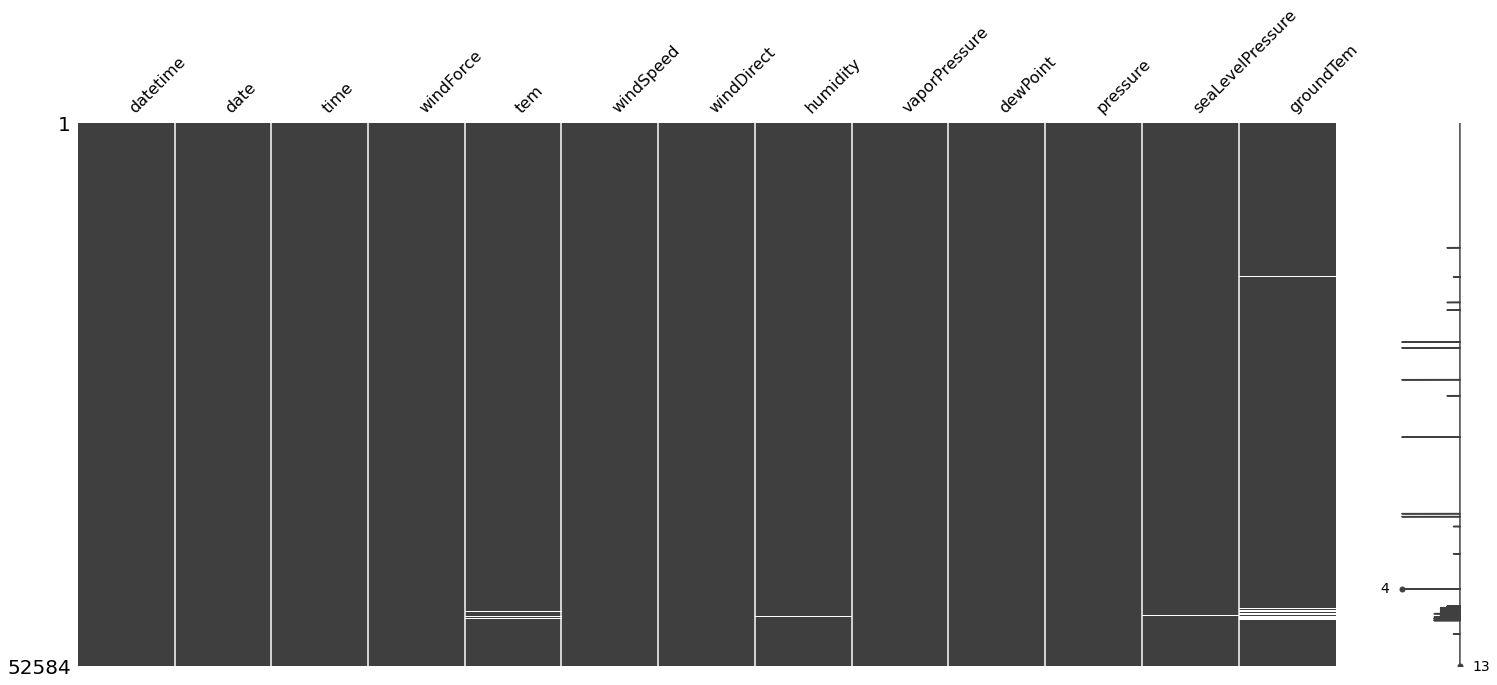

In [452]:
foreData1 = foreData1.dropna(thresh=int(len(foreData1) * 0.7), axis=1)
msno.matrix(foreData1)
plt.show()

In [453]:
foreData1= foreData1.replace('', np.nan)

In [ ]:
foreData1[foreData1.tem.isnull()==True]

foreData2[foreData2.tem.isnull()==True]

In [474]:
foreData2 = foreData1.copy()

#### null 인 거 앞에 값으로 변경

In [475]:
foreData2.fillna(method='pad',inplace=True) #기온
#foreData2['tem'].fillna(method='backfill',inplace=True) #기온 뒤 값으로 채우기
#foreData2['tem'].fillna(method='pad',inplace=True) #기온
#foreData2['windSpeed'].fillna(method='pad',inplace=True) #바람

In [479]:
foreData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          52584 non-null  datetime64[ns]
 1   date              52584 non-null  datetime64[ns]
 2   time              52584 non-null  datetime64[ns]
 3   windForce         52584 non-null  int64         
 4   tem               52584 non-null  object        
 5   windSpeed         52584 non-null  object        
 6   windDirect        52584 non-null  object        
 7   humidity          52584 non-null  object        
 8   vaporPressure     52584 non-null  object        
 9   dewPoint          52584 non-null  object        
 10  pressure          52584 non-null  object        
 11  seaLevelPressure  52584 non-null  object        
 12  groundTem         52584 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(9)
memory usage: 5.2+ MB


In [478]:
foreData2.isnull().sum()

datetime            0
date                0
time                0
windForce           0
tem                 0
windSpeed           0
windDirect          0
humidity            0
vaporPressure       0
dewPoint            0
pressure            0
seaLevelPressure    0
groundTem           0
dtype: int64

In [480]:
foreData = foreData2.copy()

In [481]:
foreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          52584 non-null  datetime64[ns]
 1   date              52584 non-null  datetime64[ns]
 2   time              52584 non-null  datetime64[ns]
 3   windForce         52584 non-null  int64         
 4   tem               52584 non-null  object        
 5   windSpeed         52584 non-null  object        
 6   windDirect        52584 non-null  object        
 7   humidity          52584 non-null  object        
 8   vaporPressure     52584 non-null  object        
 9   dewPoint          52584 non-null  object        
 10  pressure          52584 non-null  object        
 11  seaLevelPressure  52584 non-null  object        
 12  groundTem         52584 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(9)
memory usage: 5.2+ MB


## 데이터 저장

In [482]:
foreData.to_csv("preprocession_Data.csv", mode='w')

#   ===============================================================






###### 버리기 아까운 혹시몰라서

In [ ]:
# data1 = data1.astype({3: np.float,4: np.float,5: np.float,6: np.float
#                       ,7: np.float,8: np.float,9: np.float
#                       ,10: np.float,11: np.float,12: np.float
#                       ,13: np.float,14: np.float,16: np.float})
# data1.dftype()    
# arr = ['date','tem','temQC'
#        ,'rain','rainQC'
#        ,'windSpeed','windSpeedQC','windDirection','windDirectionQC'
#        ,'snow','snow3Hour'
#        ,'cloud','middleCloud','clodeUn','highCloud']

#data1.to_csv("weather_data_day.csv", mode='w')

In [ ]:
foreData4  = foreData.copy()
foreData4.info

<bound method DataFrame.info of                        1    2    3    4    5   6   ...   21   22   23   24   25   26
0     2013-01-01 00:00:00  1.3  NaN  3.2  340  77  ...  NaN    0  NaN  NaN  NaN  NaN
1     2013-01-01 01:00:00   .9  NaN  2.6  320  77  ...  NaN    0  NaN  NaN  NaN  NaN
2     2013-01-01 02:00:00  1.5  NaN    3  340  77  ...  NaN    0  NaN  NaN  NaN  NaN
3     2013-01-01 03:00:00  2.7    0  1.7  270  74  ...   01   .3  NaN  NaN  NaN  NaN
4     2013-01-01 04:00:00   .6  NaN  1.8  320  82  ...  NaN   .1  NaN  NaN  NaN  NaN
...                   ...  ...  ...  ...  ...  ..  ...  ...  ...  ...  ...  ...  ...
52584 2018-12-31 19:00:00  4.3  NaN  4.7  340  58  ...  NaN  3.3  NaN  NaN  NaN  NaN
52585 2018-12-31 20:00:00  3.9  NaN  4.5  360  61  ...  NaN  2.9  NaN  NaN  NaN  NaN
52586 2018-12-31 21:00:00  3.5  NaN    4  360  59  ...  NaN  1.9  NaN  NaN  NaN  NaN
52587 2018-12-31 22:00:00  3.8  NaN  3.4   20  61  ...  NaN  2.1  NaN  NaN  NaN  NaN
52588 2018-12-31 23:00:00  3.7  N

In [ ]:
foreData4[foreData4[1].isin(['187'])]


ValueError: ignored

In [ ]:
foreData4[foreData4[1].str.contains('24:00')]

In [ ]:
len(foreData4[foreData4[1].str.contains('23:00')])

In [ ]:
for i in range(0,25):
  if i<10: num1 = "0"+str(i)+":00"
  else : num1 = str(i)+":00"
  #print(num1)
  print(num1, len(foreData4[foreData4[1].str.contains(num1)]))

In [ ]:
for i in range(1,13):
  if i<10: num1 = "-0"+str(i)+"-"
  else : num1 = "-"+str(i)+"-"
  #print(num1)
  print(num1, len(foreData4[foreData4[1].str.contains(num1)]))

In [ ]:
len(foreData4)

In [ ]:
totsum=0
for j in range(2013,2020,1):
  sum1 = 0
  for i in range(1,13):
    
    if i<10: num1 = str(j)+"-0"+str(i)
    else : num1 = str(j)+"-"+str(i)
    #print(num1)
    print(num1, len(foreData4[foreData4[1].str.contains(num1)]))
    sum1=sum1+len(foreData4[foreData4[1].str.contains(num1)])
  print(sum1)
  totsum += sum1
  print("======================================")

print(totsum) 

In [ ]:
foreData4[foreData4[1].str.contains('2015-11')]

In [ ]:
foreData0 = foreData[foreData4[1].str.contains('2015-06')].copy()
foreData0

찾았다.,....죽여,,, 2016 30분 데이터^^

In [ ]:
u = 2016
for j in range(24,26,1):
  if j<10: y = str(u)+"-01-0"+str(j)+" "
  else : y = str(u)+"-01-"+str(j)+" "
  for i in range(0,24):
    if i<10: num1 = y + "0"+str(i)+":30"
    else : num1 = y+ str(i)+":30"
    print(num1, len(foreData4[foreData4[1].str.contains(num1)]))

In [ ]:
len(foreData4)

In [ ]:
foreData4.drop(foreData4.loc[foreData4[1].str.contains(':30')].index, inplace=True)

In [ ]:
len(foreData4)

In [ ]:
u = 2017
for j in range(1,31,1):
  if j<10: y = str(u)+"-04-0"+str(j)+" "
  else : y = str(u)+"-04-"+str(j)+" "
  for i in range(12,24):
    if i<10: num1 = y + "0"+str(i)+":00"
    else : num1 = y+ str(i)+":00"
    print(num1, len(foreData4[foreData4[1].str.contains(num1)]))

여기서부터 미리 테스트

In [ ]:
foreData5 = foreData1.copy()

In [ ]:
foreData5 = foreData1.copy()
foreData5[foreData5[1].str.contains('2015-06-27 04:00') ==True].index
foreData5[foreData5[1].str.contains('2015-06-27 06:00') ==True].index
print(foreData5[foreData5[1].str.contains('2015-06-27 04:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2015-06-27 06:00') ==True].index)

df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2015-06-27 04:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2015-06-27 06:00') ==True].index[0]+1])

In [ ]:
foreData5[foreData5[1].str.contains('2015-06-27 04:00') ==True].index[0]

In [ ]:
df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2015-06-27 04:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2015-06-27 06:00') ==True].index[0]+1])

In [ ]:
foreData6 = foreData5.copy()

In [ ]:
df[2].astype(float).mean()

In [ ]:
df1 = pd.DataFrame({1: '2015-06-27 05:00',
 2: df[2].astype(float).mean(),
 3: df[3].astype(float).mean(),
 4: df[4].astype(float).mean(),
 5: df[5].astype(float).mean(),
 6: df[6].astype(float).mean(),
 7: df[7].astype(float).mean(),
 8: df[8].astype(float).mean(),
 9: df[9].astype(float).mean(),
 10: df[10].astype(float).mean(),
 11: df[11].astype(float).mean(),
 12: df[12].astype(float).mean(),
 13: df[13].astype(float).mean(),
 14: df[14].astype(float).mean(),
 15: df[15].astype(float).mean(),
 16: df[16].astype(float).mean(),
 17: df[17].astype(float).mean(),
 18: df[18].astype(float).mean(),
 19: df[19].astype(float).mean(),
 20: df[20].astype(float).mean(),
 21: df[21].astype(float).mean(),
 22: df[22].astype(float).mean(),
 23: df[23].astype(float).mean(),
 24: df[24].astype(float).mean(),
 25: df[25].astype(float).mean(),
 26: df[26].astype(float).mean()},index=[52585])

In [ ]:
foreData6 = pd.concat([foreData6, df1]) 

In [ ]:
foreData6

2015-11-02 21:00 1
2015-11-02 22:00 0
2015-11-02 23:00 1
빠진거^^

In [ ]:
foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index
foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index
print(foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index)

In [ ]:
foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index
foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index
print(foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index)
df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index[0]+1])

In [ ]:
df

In [ ]:
foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index
foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index
print(foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index)
df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2015-11-02 21:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index[0]+1])
df1 = pd.DataFrame({1: '2015-11-02 22:00',
 2: df[2].astype(float).mean(),
 3: df[3].astype(float).mean(),
 4: df[4].astype(float).mean(),
 5: df[5].astype(float).mean(),
 6: df[6].astype(float).mean(),
 7: df[7].astype(float).mean(),
 8: df[8].astype(float).mean(),
 9: df[9].astype(float).mean(),
 10: df[10].astype(float).mean(),
 11: df[11].astype(float).mean(),
 12: df[12].astype(float).mean(),
 13: df[13].astype(float).mean(),
 14: df[14].astype(float).mean(),
 15: df[15].astype(float).mean(),
 16: df[16].astype(float).mean(),
 17: df[17].astype(float).mean(),
 18: df[18].astype(float).mean(),
 19: df[19].astype(float).mean(),
 20: df[20].astype(float).mean(),
 21: df[21].astype(float).mean(),
 22: df[22].astype(float).mean(),
 23: df[23].astype(float).mean(),
 24: df[24].astype(float).mean(),
 25: df[25].astype(float).mean(),
 26: df[26].astype(float).mean()},index=[52586])

In [ ]:
foreData6 = pd.concat([foreData6, df1]) 

In [ ]:
foreData6

2017-04-25 19:00 1
2017-04-25 20:00 1
2017-04-25 21:00 0
2017-04-25 22:00 0
2017-04-25 23:00 1
2017-04-26 12:00 1
2017-04-26 13:00 1

In [ ]:
foreData5[foreData5[1].str.contains('2017-04-25 19:00') ==True].index
foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index
print(foreData5[foreData5[1].str.contains('2017-04-25 19:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2017-04-25 20:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2017-04-25 23:00') ==True].index)

In [ ]:
foreData5[foreData5[1].str.contains('2017-04-25 19:00') ==True].index
foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index
print(foreData5[foreData5[1].str.contains('2017-04-25 19:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2017-04-25 20:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2017-04-25 23:00') ==True].index)
df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2017-04-25 20:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2017-04-25 23:00') ==True].index[0]+1])

In [ ]:
df

In [ ]:
foreData5[foreData5[1].str.contains('2017-04-25 19:00') ==True].index
foreData5[foreData5[1].str.contains('2015-11-02 23:00') ==True].index
print(foreData5[foreData5[1].str.contains('2017-04-25 19:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2017-04-25 20:00') ==True].index)
print(foreData5[foreData5[1].str.contains('2017-04-25 23:00') ==True].index)
df = pd.DataFrame(foreData5.iloc[foreData5[foreData5[1].str.contains('2017-04-25 20:00') ==True].index[0]:foreData5[foreData5[1].str.contains('2017-04-25 23:00') ==True].index[0]+1])
df1 = pd.DataFrame({1: '2017-04-25 21:00',
 2: df[2].astype(float).mean(),
 3: df[3].astype(float).mean(),
 4: df[4].astype(float).mean(),
 5: df[5].astype(float).mean(),
 6: df[6].astype(float).mean(),
 7: df[7].astype(float).mean(),
 8: df[8].astype(float).mean(),
 9: df[9].astype(float).mean(),
 10: df[10].astype(float).mean(),
 11: df[11].astype(float).mean(),
 12: df[12].astype(float).mean(),
 13: df[13].astype(float).mean(),
 14: df[14].astype(float).mean(),
 15: df[15].astype(float).mean(),
 16: df[16].astype(float).mean(),
 17: df[17].astype(float).mean(),
 18: df[18].astype(float).mean(),
 19: df[19].astype(float).mean(),
 20: df[20].astype(float).mean(),
 21: df[21].astype(float).mean(),
 22: df[22].astype(float).mean(),
 23: df[23].astype(float).mean(),
 24: df[24].astype(float).mean(),
 25: df[25].astype(float).mean(),
 26: df[26].astype(float).mean()},index=[52587])
foreData6 = pd.concat([foreData6, df1]) 

In [ ]:
foreData6 = pd.concat([foreData6, df1]) 

In [ ]:
foreData6

In [ ]:
df1 = pd.DataFrame({1: '2017-04-25 22:00',
 2: df[2].astype(float).mean(),
 3: df[3].astype(float).mean(),
 4: df[4].astype(float).mean(),
 5: df[5].astype(float).mean(),
 6: df[6].astype(float).mean(),
 7: df[7].astype(float).mean(),
 8: df[8].astype(float).mean(),
 9: df[9].astype(float).mean(),
 10: df[10].astype(float).mean(),
 11: df[11].astype(float).mean(),
 12: df[12].astype(float).mean(),
 13: df[13].astype(float).mean(),
 14: df[14].astype(float).mean(),
 15: df[15].astype(float).mean(),
 16: df[16].astype(float).mean(),
 17: df[17].astype(float).mean(),
 18: df[18].astype(float).mean(),
 19: df[19].astype(float).mean(),
 20: df[20].astype(float).mean(),
 21: df[21].astype(float).mean(),
 22: df[22].astype(float).mean(),
 23: df[23].astype(float).mean(),
 24: df[24].astype(float).mean(),
 25: df[25].astype(float).mean(),
 26: df[26].astype(float).mean()},index=[52588])

In [ ]:
foreData6 = pd.concat([foreData6, df1]) 

In [ ]:
foreData6